In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

train_path = "../data/heloc/heloc_train.csv"
test_path = "../data/heloc/heloc_test.csv"
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

df_train.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,69,148,4,66,41,0,0,100,-7,...,10,-7,1,1,32,60,7,3,1,50
1,Bad,77,229,3,109,23,0,0,100,-7,...,35,0,0,0,38,93,4,3,1,58
2,Bad,58,46,7,38,13,0,0,93,8,...,50,-7,2,2,80,84,5,4,1,90
3,Bad,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
4,Bad,80,226,2,66,35,0,0,100,-7,...,47,0,0,0,2,77,5,7,0,62


In [3]:
print(df_train['RiskPerformance'].value_counts())
print(df_train['RiskPerformance'].unique())
print(df_train['RiskPerformance'].dtype)


RiskPerformance
Bad     4925
Good    4488
Name: count, dtype: int64
['Bad' 'Good']
object


In [4]:
df_train.columns

Index(['RiskPerformance', 'ExternalRiskEstimate', 'MSinceOldestTradeOpen',
       'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades',
       'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec',
       'PercentTradesNeverDelq', 'MSinceMostRecentDelq',
       'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'NumTotalTrades',
       'NumTradesOpeninLast12M', 'PercentInstallTrades',
       'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days',
       'NetFractionRevolvingBurden', 'NetFractionInstallBurden',
       'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance',
       'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance'],
      dtype='object')

In [5]:
# Step 2 – Encode target variable (Bad -> 0, Good -> 1)
df_train['RiskPerformance'] = (
    df_train['RiskPerformance']
        .astype(str)
        .str.strip()
        .str.lower()
        )

df_train['RiskPerformance'] = df_train['RiskPerformance'].map({
    'bad': 0,
    'good': 1
})

print(df_train['RiskPerformance'].value_counts(dropna=False))
print(df_train['RiskPerformance'].dtype)

RiskPerformance
0    4925
1    4488
Name: count, dtype: int64
int64


In [6]:
# Step 3 - Data Overview
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)

print("\n--- Train Info ---")
df_train.info()

df_train.describe().T.head(15)

Train shape: (9413, 24)
Test shape: (1046, 23)

--- Train Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9413 entries, 0 to 9412
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   RiskPerformance                     9413 non-null   int64
 1   ExternalRiskEstimate                9413 non-null   int64
 2   MSinceOldestTradeOpen               9413 non-null   int64
 3   MSinceMostRecentTradeOpen           9413 non-null   int64
 4   AverageMInFile                      9413 non-null   int64
 5   NumSatisfactoryTrades               9413 non-null   int64
 6   NumTrades60Ever2DerogPubRec         9413 non-null   int64
 7   NumTrades90Ever2DerogPubRec         9413 non-null   int64
 8   PercentTradesNeverDelq              9413 non-null   int64
 9   MSinceMostRecentDelq                9413 non-null   int64
 10  MaxDelq2PublicRecLast12M            9413 non-null   int64
 11  Ma

,count,mean,std,min,25%,50%,75%,max
RiskPerformance,9413.0,0.476787,0.499487,0.0,0.0,0.0,1.0,1.0
ExternalRiskEstimate,9413.0,67.362265,21.248076,-9.0,63.0,71.0,79.0,94.0
MSinceOldestTradeOpen,9413.0,184.131626,110.426203,-9.0,117.0,177.0,251.0,803.0
MSinceMostRecentTradeOpen,9413.0,8.516945,13.337636,-9.0,3.0,5.0,11.0,383.0
AverageMInFile,9413.0,73.869648,38.989435,-9.0,52.0,74.0,95.0,383.0
NumSatisfactoryTrades,9413.0,19.352385,13.050191,-9.0,11.0,19.0,27.0,79.0
NumTrades60Ever2DerogPubRec,9413.0,0.041007,2.532663,-9.0,0.0,0.0,1.0,19.0
NumTrades90Ever2DerogPubRec,9413.0,-0.144481,2.388159,-9.0,0.0,0.0,0.0,19.0
PercentTradesNeverDelq,9413.0,86.579518,26.145560,-9.0,87.0,96.0,100.0,100.0
MSinceMostRecentDelq,9413.0,6.796770,20.545241,-9.0,-7.0,-7.0,14.0,83.0


In [7]:
# Step 4 - Check missing values
missing_neg9 = (df_train == -9).sum().sort_values(ascending=False)

print("Missing (-9) values per column:")
print(missing_neg9[missing_neg9 > 0])

print("\nTotal -9 count:", missing_neg9.sum())

# -9 = NA
feature_cols = df_train.columns.drop('RiskPerformance')

df_train[feature_cols] = df_train[feature_cols].replace(-9, np.nan)
df_test[feature_cols] = df_test[feature_cols].replace(-9, np.nan)

print("Remaining -9 count in train:", (df_train[feature_cols] == -9).sum().sum())
print("Remaining -9 count in test:", (df_test[feature_cols] == -9).sum().sum())

Missing (-9) values per column:
ExternalRiskEstimate                  547
NumTotalTrades                        537
NumBank2NatlTradesWHighUtilization    537
NumInstallTradesWBalance              537
NumRevolvingTradesWBalance            537
NetFractionInstallBurden              537
NetFractionRevolvingBurden            537
NumInqLast6Mexcl7days                 537
NumInqLast6M                          537
MSinceMostRecentInqexcl7days          537
PercentInstallTrades                  537
NumTradesOpeninLast12M                537
PercentTradesWBalance                 537
MaxDelqEver                           537
MaxDelq2PublicRecLast12M              537
MSinceMostRecentDelq                  537
PercentTradesNeverDelq                537
NumTrades90Ever2DerogPubRec           537
NumTrades60Ever2DerogPubRec           537
NumSatisfactoryTrades                 537
AverageMInFile                        537
MSinceMostRecentTradeOpen             537
MSinceOldestTradeOpen                 537
dt

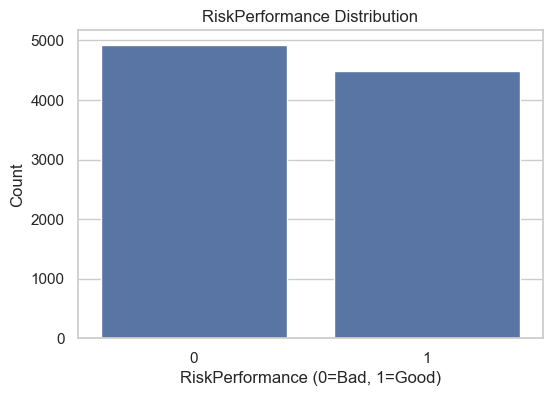

In [8]:
# Step 5 - Target Variable Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df_train, x='RiskPerformance')
plt.title("RiskPerformance Distribution")
plt.xlabel("RiskPerformance (0=Bad, 1=Good)")
plt.ylabel("Count")
plt.show()

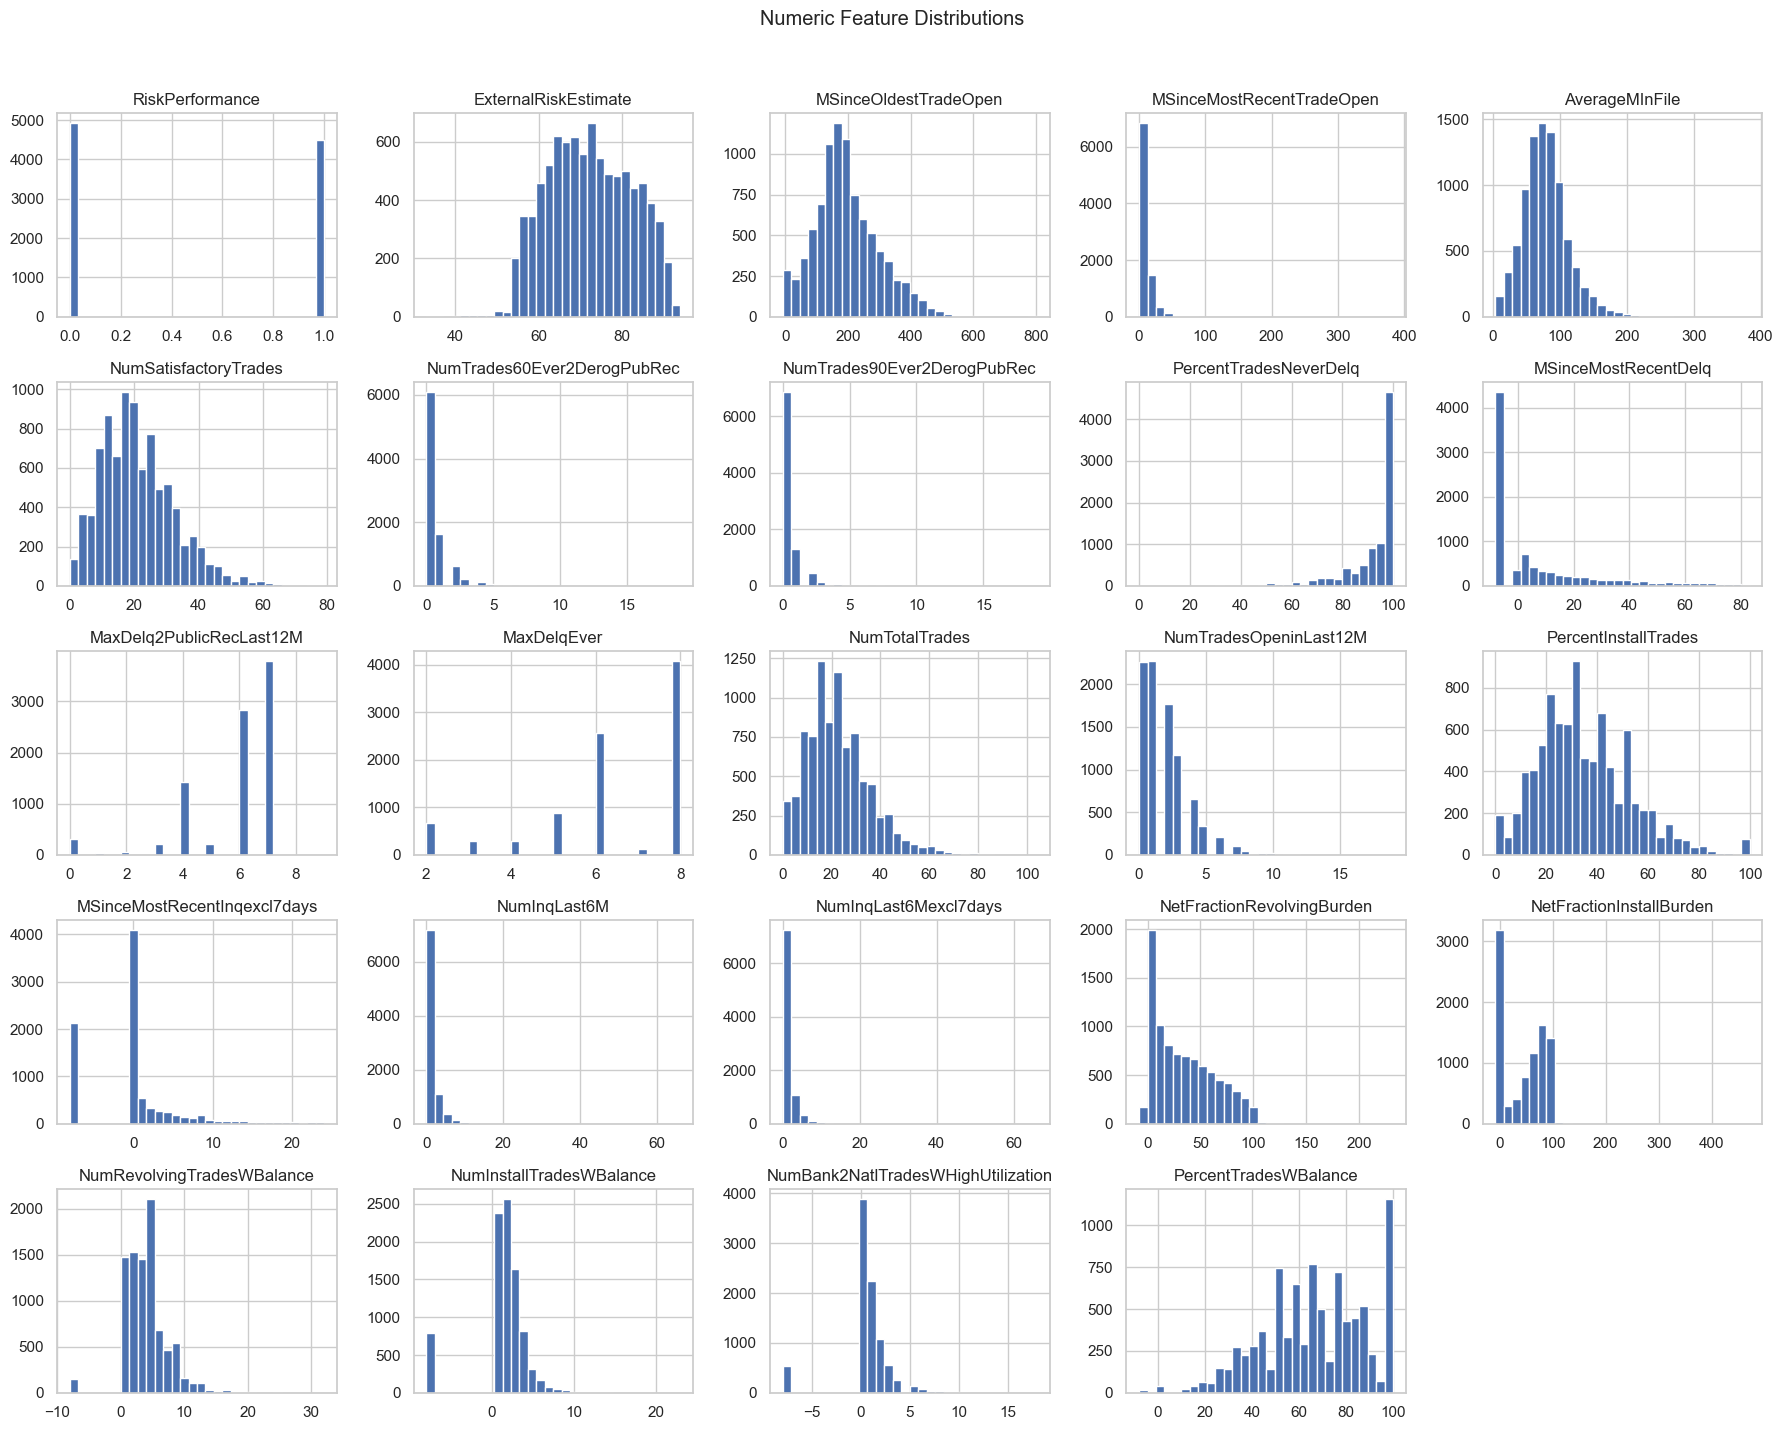

In [9]:
# Step 6 - numerical Feature Distributions
numeric_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()

df_train[numeric_cols].hist(figsize=(18, 14), bins=30)
plt.suptitle("Numeric Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()

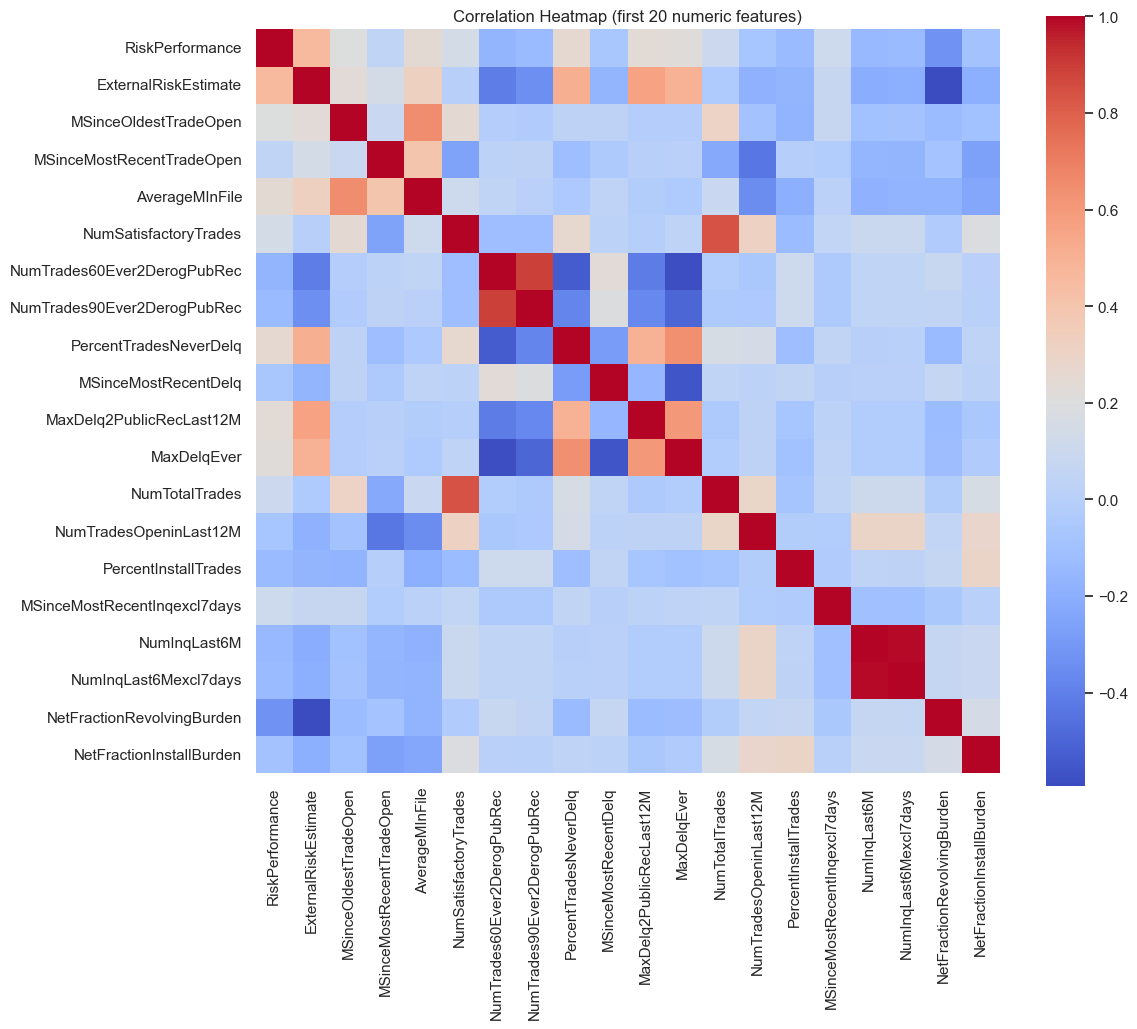

In [48]:
# Step 7 - Correlation Heatmap
subset_cols = numeric_cols[:20]
corr_matrix = df_train[subset_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap (first 20 numeric features)")
plt.show()

## EDA Summary – heloc
1. **Data Types & Structure**

The dataset contains 23 numeric input features and 1 categorical target variable (RiskPerformance).

All features are purely numeric, but use special placeholder values (-9) to represent missing information.

No one-hot encoded or categorical explanatory variables.

2. **Missing Values**

Several features use -9 to represent missing values, not actual numeric values.

After replacing -9 with NaN, the dataset contains no remaining missing values.

Missingness is not uniform across features—delinquency-related features have more -9 values.

3. **Feature Distributions**

Most numeric features (e.g., NumTotalTrades, PercentTradesNeverDelq, MSinceMostRecentTradeOpen) show:

    Highly skewed distributions

    Long right tails, typical of credit-risk datasets

Some variables have many zeros (e.g., NumTrades90Ever2DerogPubRec), indicating sparse delinquency events.

4. **Correlation Structure**

Overall feature correlations are moderate, forming clear clusters:

    Trade count cluster: NumTotalTrades, NumTradesOpeninLast12M, PercentTradesNeverDelq

    Delinquency cluster: MaxDelqEver, NumTrades90Ever2DerogPubRec

    Time-since-event cluster: MSinceMostRecentDelq, MSinceMostRecentTradeOpen

No pairs show extremely high correlation, meaning:

    Multicollinearity is not a major issue

    Dimensionality reduction (PCA) is not required

5. **Target Variable**

RiskPerformance is binary and nearly balanced:

    Class 0 (“Bad”): ~4925

    Class 1 (“Good”): ~4488

This does not require aggressive class rebalancing.

6. **Modeling Implications**

The dataset is well-suited for tree-based models (LightGBM, XGBoost, CatBoost).

Scaling is not required for tree-based models.

Missing values already handled via -9 → NaN replacement.

Some skewed and long-tail distributions may benefit from:

    log-scaling (optional), or

    monotonic constraints (optional for XGBoost/LightGBM)

The balanced target distribution simplifies model training.